In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [74]:
tf.keras.utils.PyDataset(workers=8, use_multiprocessing=True, max_queue_size=20)

In [79]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [13]:
sns.set_style("whitegrid")
plt.style.use("dark_background")
sns.axes_style()

{'axes.facecolor': 'black',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': 'white',
 'figure.facecolor': 'black',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [64]:
train_dir = "/mnt/c/Users/iosif/Desktop/Python/Tensorflow/10_food_classes_all_data/train"
test_dir = "/mnt/c/Users/iosif/Desktop/Python/Tensorflow/10_food_classes_all_data/test"

train_dir_10p = "/mnt/c/Users/iosif/Desktop/Python/Tensorflow/10_food_classes_10_percent/train"
test_dir_10p = "/mnt/c/Users/iosif/Desktop/Python/Tensorflow/10_food_classes_10_percent/test"
#----------------------------------------------------
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                shear_range= 0.2,
                                                                zoom_range= 0.2,
                                                                rescale = 1/255.,
                                                                horizontal_flip = True,
                                                                height_shift_range = 0.2,
                                                                rotation_range = 0.2,
                                                                width_shift_range = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                shear_range= 0.2,
                                                                zoom_range= 0.2,
                                                                rescale = 1/255.,
                                                                horizontal_flip = True,
                                                                height_shift_range = 0.2,
                                                                rotation_range = 0.2,
                                                                width_shift_range = 0.2)
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                target_size=(224,224))

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224))

train_data_10p = train_datagen.flow_from_directory(directory=train_dir_10p,
                                                   target_size=(224,224))

test_data_10p = train_datagen.flow_from_directory(directory=train_dir_10p,
                                                   target_size=(224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Found 750 images belonging to 10 classes.
Found 750 images belonging to 10 classes.


In [15]:
names_food = train_data.class_indices

food_names = []

for k in names_food:
    food_names.append(k)
print(food_names)

In [17]:
def cerate_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    return tensorboard_callback

# Use the Models

In [18]:
resnet = tf.keras.applications.ResNet50(weights="imagenet")
effinet = tf.keras.applications.EfficientNetB0(weights="imagenet")

I0000 00:00:1737368630.023295  247817 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21770 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


In [19]:
def object_from_screenshot():
    screenshots_folder = os.listdir("/mnt/c/Users/iosif/Pictures/Screenshots")
    latest_shot = screenshots_folder[-1]
    image_link = f"/mnt/c/Users/iosif/Pictures/Screenshots/{latest_shot}"
    img = tf.keras.preprocessing.image.load_img(image_link, target_size = (224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    resnet_prediction = resnet.predict(img_array)
    resnet_decoded_predictions = tf.keras.applications.resnet.decode_predictions(resnet_prediction, top=3),
    
    img = tf.keras.preprocessing.image.load_img(image_link, target_size = (224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    effinet_predicions = effinet.predict(img_array)
    efficinet_decoded_predictions = tf.keras.applications.efficientnet.decode_predictions(effinet_predicions, top=3)
    
    print(f" ResNet predicts:       {resnet_decoded_predictions[0][0][0][1]},  {resnet_decoded_predictions[0][0][1][1]},    {resnet_decoded_predictions[0][0][2][1]}\
    \n EffiientNet pedicts:   {efficinet_decoded_predictions[0][:3][0][1]},  {efficinet_decoded_predictions[0][:3][1][1]},  {efficinet_decoded_predictions[0][:3][1][1]}\
    \n{plt.imshow(img),plt.axis('off'), plt.show()}")

# Play with the models

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


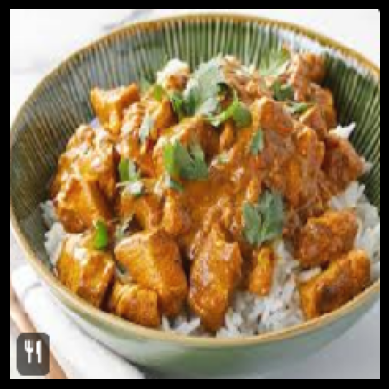

 ResNet predicts:       potpie,  plate,    hot_pot    
 EffiientNet pedicts:   potpie,  hot_pot,  hot_pot    
(<matplotlib.image.AxesImage object at 0x7f546fc8dc90>, (np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5)), None)


In [97]:
object_from_screenshot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


('ice_cream', <matplotlib.image.AxesImage at 0x7f546fc98cd0>)

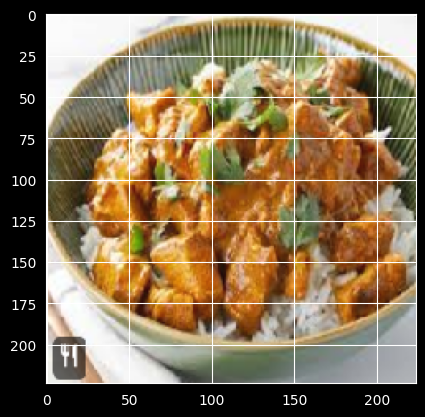

In [96]:
screenshots_folder = os.listdir("/mnt/c/Users/iosif/Pictures/Screenshots")
latest_shot = screenshots_folder[-1]
image_link = f"/mnt/c/Users/iosif/Pictures/Screenshots/{latest_shot}"
img = tf.keras.preprocessing.image.load_img(image_link, target_size = (224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
resnet_prediction = my_resnet.predict(img_array)[0][:9]
actual_pred = np.argmax(resnet_prediction)
food_names[actual_pred], plt.imshow(img)

In [107]:
resnet_3 = tf.keras.Sequential()

resnet_3.add(tf.keras.applications.ResNet50(include_top=False, classes=10, pooling="avg", input_shape=(224,224,3)))
resnet_3.add(tf.keras.layers.Dense(10, activation="softmax"))

resnet_3.compile(loss="categorical_crossentropy",
                 optimizer = "Adam",
                 metrics = ["accuracy"])

hist_resnet_3 = resnet_3.fit(epochs=50,
                             x=train_data_10p,
                             validation_data=test_data_10p,
                             steps_per_epoch=len(train_data_10p),
                             validation_steps=len(test_data_10p))

Epoch 1/50


2025-01-20 13:47:25.936856: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_convert_reduce_fusion_36', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_convert_reduce_fusion_27', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_convert_reduce_fusion_15', 8 bytes spill stores, 8 bytes spill loads



19/24 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.1918 - loss: 2.6465

2025-01-20 13:47:42.721946: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_convert_reduce_fusion_18', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_convert_reduce_fusion_9', 8 bytes spill stores, 8 bytes spill loads



24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.2042 - loss: 2.6539 - val_accuracy: 0.1000 - val_loss: 14.5063
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.2516 - loss: 2.7031 - val_accuracy: 0.1000 - val_loss: 14.5063
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 453ms/step - accuracy: 0.3359 - loss: 2.0067 - val_accuracy: 0.1000 - val_loss: 14.5063
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - accuracy: 0.4734 - loss: 1.6527 - val_accuracy: 0.1000 - val_loss: 3.9831
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.5383 - loss: 1.4013 - val_accuracy: 0.1000 - val_loss: 3.1287
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.5718 - loss: 1.2669 - val_accuracy: 0.1000 - val_loss: 2.3735
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.6320 - loss: 1.1241 - val_accuracy: 0.1000 - val_loss: 2.8536
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - accuracy: 0.6258 - loss: 1.1082 - val_accuracy: 0.100

In [119]:
effinet_3 = tf.keras.Sequential()

effinet_3.add(tf.keras.applications.EfficientNetB0(include_top=False, classes=10, pooling="avg", input_shape=(224,224,3)))
effinet_3.add(tf.keras.layers.Dense(10, activation="softmax"))

effinet_3.compile(loss="categorical_crossentropy",
                  optimizer = "Adam",
                  metrics=["accuracy"])

hist_eff_3 = effinet_3.fit(epochs=50,
              x=train_data_10p,
              validation_data=test_data_10p,
              steps_per_epoch=len(train_data_10p),
              validation_steps=len(test_data_10p))

Epoch 1/50
 6/24 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.0824 - loss: 2.4102

E0000 00:00:1737374860.232103  248384 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1737374860.419203  248384 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-01-20 14:08:00.442282: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_add_multiply_reduce_fusion_2', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_multiply_reduce_fusion_1', 4 bytes spill stores, 4 bytes spill loads



24/24 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1833 - loss: 2.2162 - val_accuracy: 0.1000 - val_loss: 2.4676
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 673ms/step - accuracy: 0.6279 - loss: 1.1474 - val_accuracy: 0.1000 - val_loss: 2.5269
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 479ms/step - accuracy: 0.7249 - loss: 0.8339 - val_accuracy: 0.1000 - val_loss: 2.7710
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.8328 - loss: 0.4772 - val_accuracy: 0.1000 - val_loss: 2.8964
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - accuracy: 0.8496 - loss: 0.3910 - val_accuracy: 0.1000 - val_loss: 2.3920
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 473ms/step - accuracy: 0.8902 - loss: 0.3401 - val_accuracy: 0.1000 - val_loss: 2.5173
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - accuracy: 0.8950 - loss: 0.3054 - val_accuracy: 0.1000 - val_loss: 2.5545
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step - accuracy: 0.9146 - loss: 0.2438 - val_accuracy: 0.1013 -

In [2]:
pd.DataFrame(hist_resnet_3.history).plot()
pd.DataFrame(hist_eff_3.history).plot()

NameError: name 'pd' is not defined

In [122]:
resnet_3.evaluate(test_data)
effinet_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.5003 - loss: 2.7674
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.1085 - loss: 4.6342


[4.690675258636475, 0.10000000149011612]